# Práctica de Machine Learning nº2

Balentina Agudelo Escobar

El objetivo de este proyecto es evaluar vuestra capacidad para llevar a cabo un proyecto de *Machine Learning*. 

En el portal de datos abiertos de la CAIB, hemos seleccionado un *dataset* que ofrezca flexibilidad a la hora de aplicar diferentes algoritmos y con un tiempo de dedicación razonable.  

Trabajaremos con los datos recopilados por una estación de control de calidad del aire en el Hospital Joan March de Mallorca: [datos](https://intranet.caib.es/opendatacataleg/dataset/mesuraments-estacio-control-qualitat-aire-illes-balears-estacio-hospital-joan-march-mallorca/resource/dcef6fdf-3836-4a98-92f9-e8efc2839f9c).  

La información disponible en la web sobre su contenido es la siguiente:  
>>> Las concentraciones de los contaminantes SO₂, NO, NO₂, O₃, PM10, PM2.5, benceno, tolueno y xileno aparecen en microgramos por metro cúbico (µg/m³).  
>>> Las unidades del contaminante CO son miligramos por metro cúbico (mg/m³).  
>>> Para cada contaminante se incluye un "flag" o indicador de estado, donde V significa que el dato es válido.  

Dado que encontramos más columnas y no somos expertos en medio ambiente, hemos pedido a ChatGPT una descripción adicional:  
>>>  
- **DATA_HI, PERIODE_HI**: información temporal de los datos.  
- **SO2_HI, FL_SO2**: concentración de dióxido de azufre (SO₂) en µg/m³ y su indicador de estado.  
- **NO_HI, FL_NO**: concentración de monóxido de nitrógeno (NO) en µg/m³ y su indicador de estado.  
- **NO2_HI, FL_NO2**: concentración de dióxido de nitrógeno (NO₂) en µg/m³ y su indicador de estado.  
- **NOX_HI, FL_NOX**: concentración de NOx (óxidos de nitrógeno) en µg/m³ y su indicador de estado.  
- **O3_HI, FL_O3**: concentración de ozono (O₃) en µg/m³ y su indicador de estado.  
- **PM2,5_HI, FL_PM2,5**: concentración de partículas finas PM2,5 en µg/m³ y su indicador de estado.  
- **PM10_HI, FL_PM10**: concentración de partículas PM10 en µg/m³ y su indicador de estado.  
- **DD_HI, FL_DD**: dirección del viento (°) y su indicador de estado.  
- **VV_HI, FL_VV**: velocidad del viento (m/s) y su indicador de estado.  
- **TMP_HI, FL_TMP**: temperatura del aire (°C) y su indicador de estado.  
- **HR_HI, FL_HR**: humedad relativa (%) y su indicador de estado.  
- **PRB_HI, FL_PRB**: presión barométrica (hPa) y su indicador de estado.  
- **LL_HI, FL_LL**: nivel de lluvia (mm) y su indicador de estado.  
- **RS_HI, FL_RS**: radiación solar (W/m²) y su indicador de estado.  


El [informe de calidad del aire de las Islas Baleares 2021](https://www.caib.es/sites/atmosfera/f/409181) ofrece una buena explicación de las diferentes estaciones de captación, así como los umbrales de evaluación y los recomendados por la OMS para los contaminantes (página 9).


## Objetivo

En este caso, debéis de diseñar una variable objetivo basado en la calidad del aire. Por ejemplo, en la página 10 del informe se clasifica en excelente, bueno o regular la calidad si se superan ciertos umbrales.

Una vez definida dicha variable debéis de aplicar un modelo de classificación que sea adecuado para los datos. Dicho modelo tiene como objetivo predecir futuras muestras dentro de esa clasificiación. Naturalmente, *ya conocemos los criterios para etiquetar la calidad del aire*, la cuestión radica en si el modelo que diseñais es tan bueno como la aplicación de estos criterios.

Este enfoque puede resultar de interés si añadimos variables exógenas (congestión de tráfico, emisiones de industria, dias laborables/festividades, llegada de cruceros, etc.).

## Criterios de valoración
- La preparación y selección de datos
- La elección del algoritmo 
- El estudio de métricas
- Y la comparativa con otros algoritmos
- El apoyo en visualizaciones para la explicación de los resultados
- La coherencia del proceso

Entrega:
- Solo está permitida la entrega de **un único** documento con formato notebook de jupyter (.ipynb) mediante su subida a la tarea en AulaDigital. Se espera un informe combinado de texto y código documentado.
  - Especificar en la primera celda del documento: nombre y apellidos.

  - Entregar el notebook con los resultados de su ejecución. 


In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
datosco = pd.read_csv("datos_practica_ML2.csv", sep=",")
datosco = datosco.drop_duplicates()
print(datosco.head())


   _id                 DATA_HI  PERIODE_HI  SO2_HI FL_SO2  NO_HI FL_NO  \
0    1  01/01/2011 12:00:00 AM         1.0   0.625      V  0.250     V   
1    2  01/01/2011 12:00:00 AM         2.0   0.600      V  0.250     V   
2    3  01/01/2011 12:00:00 AM         6.0   0.650      V  0.225     V   
3    4  01/01/2011 12:00:00 AM         7.0   0.625      V  0.200     V   
4    5  01/01/2011 12:00:00 AM        17.0   0.750      V  0.200     V   

   NO2_HI FL_NO2  NOX_HI  ...  TMP_HI  FL_TMP  HR_HI  FL_HR PRB_HI  FL_PRB  \
0   4.950      V   5.500  ...   9.600       V  83.50      V    991       V   
1   5.075      V   5.550  ...   9.475       V  84.25      V    991       V   
2   3.025      V   3.500  ...   8.775       V  88.50      V    991       V   
3   2.800      V   3.225  ...   8.825       V  88.00      V    991       V   
4   2.950      V   3.350  ...  10.375       V  65.25      V  990.5       V   

  LL_HI  FL_LL RS_HI  FL_RS  
0   0.0      V   NaN    NaN  
1   0.0      V   NaN    Na


Resultados del modelo Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       1.00      0.95      0.98        43
           2       1.00      0.99      0.99        93

    accuracy                           1.00      1040
   macro avg       1.00      0.98      0.99      1040
weighted avg       1.00      1.00      1.00      1040

Precisión: 0.9971153846153846


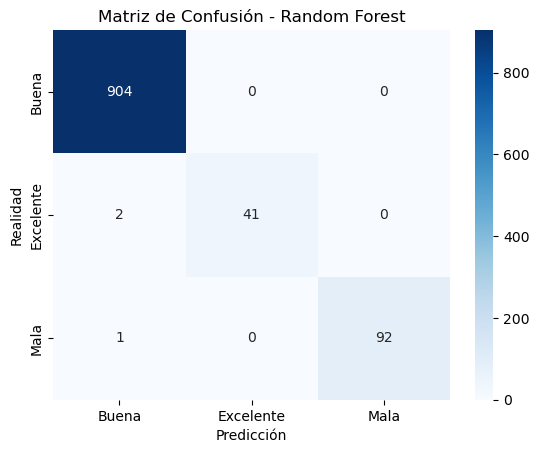

Mejores parámetros para SVM: {'C': 10, 'kernel': 'rbf'}

Resultados del modelo SVM:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       904
           1       0.95      0.88      0.92        43
           2       0.91      0.87      0.89        93

    accuracy                           0.97      1040
   macro avg       0.95      0.91      0.93      1040
weighted avg       0.97      0.97      0.97      1040

Precisión: 0.9740384615384615


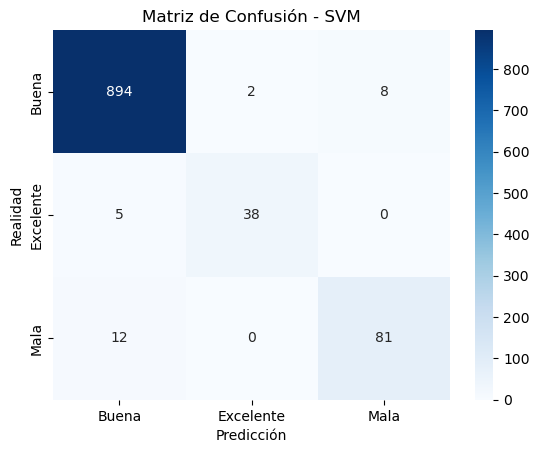


Resultados del modelo KNN:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       904
           1       1.00      0.42      0.59        43
           2       0.92      0.60      0.73        93

    accuracy                           0.94      1040
   macro avg       0.95      0.67      0.76      1040
weighted avg       0.94      0.94      0.93      1040

Precisión: 0.9355769230769231


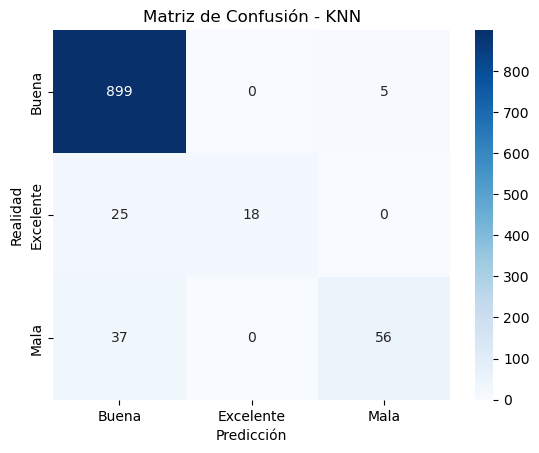

In [69]:

datosco.columns = datosco.columns.str.strip().str.lower().str.replace(" ", "_")
datosco = datosco.drop_duplicates()

numericas = ['so2_hi', 'no_hi', 'no2_hi', 'nox_hi', 'o3_hi', 
             'pm2,5_hi', 'pm10_hi', 'dd_hi', 'vv_hi', 
             'tmp_hi', 'hr_hi', 'prb_hi', 'll_hi', 'rs_hi']

datosco[numericas] = datosco[numericas].apply(pd.to_numeric, errors="coerce")
datosco[numericas] = datosco[numericas].fillna(datosco[numericas].median())

if "data_hi" in datosco.columns:
    datosco = datosco.drop(columns=["data_hi"])

if "prb_hi" in datosco.columns:
    datosco["prb_hi"] = datosco["prb_hi"].fillna(datosco["prb_hi"].mean())


for col in datosco.columns:
    if col.startswith("fl_"):
        datosco = datosco[datosco[col] == "V"]

# Clasificación de calidad del aire
def clasificar_calidad(df):
    condiciones = [
        (df["pm10_hi"] <= 20) & (df["o3_hi"] <= 50) & (df["no2_hi"] <= 40),
        (df["pm10_hi"] <= 50) & (df["o3_hi"] <= 100) & (df["no2_hi"] <= 100),
        (df["pm10_hi"] > 50) | (df["o3_hi"] > 100) | (df["no2_hi"] > 100),
    ]
    categorias = ["Excelente", "Buena", "Mala"]
    df["calidad_aire"] = np.select(condiciones, categorias, default="Mala")
    return df

datosco = clasificar_calidad(datosco)
clasificacion_map = {"Excelente": 1, "Buena": 0, "Mala": 2}
datosco["calidad_aire"] = datosco["calidad_aire"].map(clasificacion_map)

X = datosco[numericas]
y = datosco["calidad_aire"]

if X.isnull().any().any() or y.isnull().any():
    print("Hay valores nulos en los datos.")
else:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    modelos = {
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "SVM": SVC(random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5)
    }

    for nombre, modelo in modelos.items():
        if nombre == "SVM":
        
            parametros_svm = {"C": [0.1, 1, 10, 100], "kernel": ["linear", "rbf"]}
            grid_search = GridSearchCV(SVC(random_state=42), parametros_svm, cv=5, scoring="f1_macro")
            grid_search.fit(X_train, y_train)
            modelo = grid_search.best_estimator_
            print(f"Mejores parámetros para {nombre}: {grid_search.best_params_}")

        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

        # Resultados
        print(f"\nResultados del modelo {nombre}:")
        print(classification_report(y_test, y_pred))
        print("Precisión:", accuracy_score(y_test, y_pred))

        matriz = confusion_matrix(y_test, y_pred)
        sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", 
                    xticklabels=["Buena", "Excelente", "Mala"], 
                    yticklabels=["Buena", "Excelente", "Mala"])
        plt.xlabel("Predicción")
        plt.ylabel("Realidad")
        plt.title(f"Matriz de Confusión - {nombre}")
        plt.show()


Los resultados obtenidos muestran que el modelo de Random Forest logró el mejor desempeño, con una precisión del 99.71%, alcanzando valores de recall y f1-score cercanos a 1.00 en todas las clases, lo que sugiere un buen poder predictivo. Por su parte, el SVM, con los parámetros óptimos C=10 y kernel=rbf, obtuvo una precisión del 97.40%, con un desempeño ligeramente inferior en la clase minoritaria (clase 1). Finalmente, el modelo KNN mostró una precisión del 93.55%, pero con una caída significativa en el recall de la clase 1 (42%) y la clase 2 (60%), lo que indica que no logra diferenciar bien ciertos casos. A pesar del rendimiento sobresaliente de Random Forest, es importante evaluar si la alta precisión puede deberse a sobreajuste y considerar validaciones adicionales para garantizar su robustez en datos no vistos.